In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR


In [3]:
train_data=pd.read_csv(r"C:\Users\NEXSTGO\OneDrive\Desktop\c language\1\train_data_NO2.csv",delimiter=';')
train_data.head()

,Date,Time,DS18B20_Temperature,SN1_WE,SN1_Aux,NO2_Concentration
0,2023-12-21,14:43:58,20.3125,0.9638495359062043,0.961895456765999,0.04654015256848706
1,2023-12-21,14:44:59,20.3125,0.9638495359062043,0.9648265754763068,0.03160272067941862
2,2023-12-21,14:46:00,20.3125,0.961895456765999,0.961895456765999,0.037145541317500086
3,2023-12-21,14:47:01,20.375,0.9628724963361015,0.9599413776257939,0.051801134869038305
4,2023-12-21,14:48:02,20.3125,0.9677576941866146,0.9638495359062043,0.055371087144414126


In [4]:

X=train_data.drop(columns=['NO2_Concentration','Date'])
y=train_data['NO2_Concentration']

In [5]:
le = LabelEncoder()
X['DS18B20_Temperature'] = le.fit_transform(X['DS18B20_Temperature'])
X['Time']=le.fit_transform(X['Time'])
X['SN1_WE']=le.fit_transform(X['SN1_WE'])
X['SN1_Aux']=le.fit_transform(X['SN1_Aux'])
# y['NO2_Concentration']=le.fit_transform(y['NO2_Concentration'])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

c:\Users\NEXSTGO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
prediction1=model1.predict(X_test)

In [10]:
print(prediction1)

['0.0424065236180524' '0.04710382924354536' '0.04823118259366356'
 '0.042124685280522725' '0.06063206944496591' '0.05321032655668726'
 '0.04738566758107611' '0.04823118259366356' '0.07528766299650519'
 '0.03273007402953682' '0.04879485926872399' '0.06232309947014347'
 '0.04823118259366356' '0.04710382924354536' '0.0424065236180524'
 '0.06063206944496591' '0.04654015256848706' '0.04710382924354536'
 '0.042688361955583155' '0.04710382924354536' '0.03883657134267766'
 '0.042688361955583155' '0.042124685280522725' '0.03329375070459619'
 '0.04823118259366356' '0.03742737965502977' '0.04738566758107611'
 '0.06063206944496591' '0.04823118259366356' '0.042688361955583155'
 '0.042124685280522725' '0.042688361955583155' '0.056780278832062006'
 '0.042688361955583155' '0.0424065236180524' '0.042124685280522725'
 '0.042688361955583155' '0.042688361955583155' '0.04654015256848706'
 '0.03883657134267766' '0.03385742737965556' '0.0424065236180524'
 '0.0424065236180524' '0.0424065236180524' '0.04879485

In [11]:
classification_report(prediction1,y_test)
print(classification_report)

<function classification_report at 0x00000128542F6FC0>


c:\Users\NEXSTGO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEXSTGO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NEXSTGO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [12]:

cm = confusion_matrix(y_test, prediction1)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
print("Unique Classes in y_test:", np.unique(y_test))
print("Unique Classes in prediction1:", np.unique(prediction1))


Unique Classes in y_test: ['0.004546240276576984' '0.010089060914660053' '0.012249821502386384'
 '0.022771786103492085' '0.02305362444102017' '0.024462816128668588'
 '0.027187253391454287' '0.03216639735447799' '0.03273007402953682'
 '0.036863702979970936' '0.037145541317500086' '0.03742737965502977'
 '0.03855473300514851' '0.039400248017737026' '0.042688361955583155'
 '0.043533876968170605' '0.04625831423095791' '0.04654015256848706'
 '0.04682199090601567' '0.04710382924354536' '0.04738566758107611'
 '0.04766750591860579' '0.04823118259366356' '0.051237458193980005'
 '0.05151929653150969' '0.05208297320656906' '0.05236481154409874'
 '0.05264664988162843' '0.053492164894216945' '0.05649844049453232'
 '0.056780278832062006' '0.05790763218218021' '0.06119574612002528'
 '0.06288677614520284' '0.06316861448273253']
Unique Classes in prediction1: ['0.028878283416632924' '0.03273007402953682' '0.03329375070459619'
 '0.03385742737965556' '0.03742737965502977' '0.03883657134267766'
 '0.0421246

In [14]:
print("y_test:", y_test)
print("prediction1:", prediction1)


y_test: 9       0.06119574612002528
267     0.04654015256848706
143     0.04823118259366356
212    0.012249821502386384
227     0.05649844049453232
155     0.05790763218218021
283     0.04738566758107611
73      0.06288677614520284
196     0.04654015256848706
33      0.03273007402953682
185    0.039400248017737026
124     0.06288677614520284
146     0.06288677614520284
265    0.036863702979970936
5       0.04654015256848706
220     0.04654015256848706
233    0.022771786103492085
251     0.04710382924354536
45     0.042688361955583155
268    0.037145541317500086
170    0.043533876968170605
56      0.05236481154409874
200    0.037145541317500086
79     0.010089060914660053
111     0.05790763218218021
275     0.02305362444102017
274    0.042688361955583155
217     0.06119574612002528
109     0.05264664988162843
42      0.05236481154409874
203     0.05151929653150969
84     0.042688361955583155
269    0.056780278832062006
93     0.042688361955583155
46      0.03216639735447799
204     0.03

In [15]:
mse1 = mean_squared_error(y_test, prediction1)

print("Mean Squared Error:", mse1)

Mean Squared Error: 0.00013319793068195478


In [16]:
model2=LinearRegression()

In [17]:
print(y_train.unique())


['0.053492164894216945' '0.0424065236180524' '0.11211453910037249'
 '0.028878283416632924' '0.05292848821915651' '0.022771786103492085'
 '0.04156100860546495' '0.07810604637180096' '0.037145541317500086'
 '0.031884559016947235' '0.04654015256848706' '0.03827289466761882'
 '0.06758408177069686' '0.042688361955583155' '0.04184284694299304'
 '0.04879485926872399' '0.028314606741572487' '0.04823118259366356'
 '0.057625793844650525' '0.03244823569200714' '0.033575589042125875'
 '0.05649844049453232' '0.06288677614520284' '0.037709217992559455'
 '0.022489947765961336' '0.05818947051970989' '0.03799105633008914'
 '0.04738566758107611' '0.048513020931194306' '0.04766750591860579'
 '0.03329375070459619' '-0.010391191612491451' '0.03385742737965556'
 '0.03742737965502977' '0.03216639735447799' '0.03273007402953682'
 '0.04297020029311177' '0.01535004321521077' '0.056780278832062006'
 '0.028032768404042802' '0.0764150163466234' '0.04794934425613441'
 '0.06730224343316718' '0.03883657134267766' '0.

In [18]:
y_train = y_train[~y_train.str.contains('NO2_Concentration')]

y_train = pd.to_numeric(y_train, errors='coerce')
y_train = y_train.dropna()


In [19]:
X_train = X_train.loc[y_train.index]

In [20]:
model2.fit(X_train,y_train)

LinearRegression()

In [21]:
prediction2=model2.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

mse2 = mean_squared_error(y_test, prediction2)

print("Mean Squared Error:", mse2)


Mean Squared Error: 1.256899587165548e-06


In [23]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()

model3.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
prediction3=model3.predict(X_test)


In [25]:
mse3=mean_squared_error(y_test,prediction3)
print(mse3)

7.6221182593468444e-06


In [26]:


model4= SVR(C=10)
model4.fit(X_train, y_train)

predictions4 = model4.predict(X_test)

mse4 = mean_squared_error(y_test, predictions4)
print(f'Mean Squared Error: {mse4}')


Mean Squared Error: 0.0001748400689131116


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit the DecisionTreeRegressor model
model5= DecisionTreeRegressor()
model5.fit(X_train, y_train)

# Now you can make predictions
predictions5 = model5.predict(X_test)

# Evaluate the model
mse5 = mean_squared_error(y_test, predictions5)
print(f'Mean Squared Error: {mse5}')


Mean Squared Error: 3.0112353752023397e-05


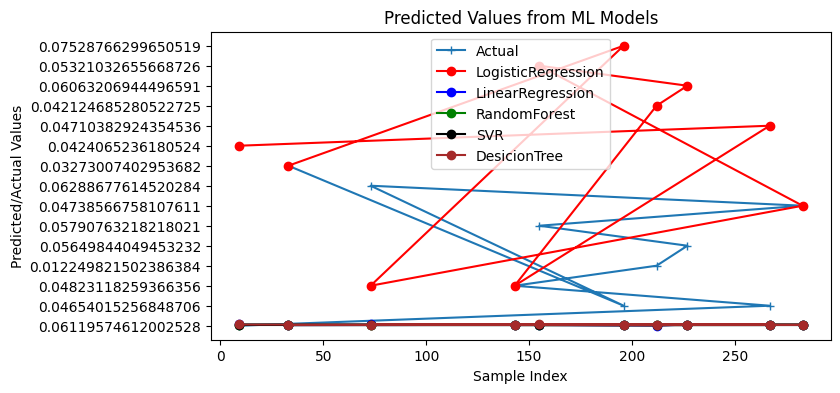

In [28]:

results = pd.DataFrame({'Actual': y_test,
                        'Model1': prediction1,
                        'Model2': prediction2,
                        'Model3': prediction3,
                        'Model4': predictions4,
                        'Model5': predictions5})

# Assuming you want to plot the first 50 samples
plt.figure(figsize=(8, 4))
plt.plot(results.index[:10], results['Actual'][:10], label='Actual', marker='+')
plt.plot(results.index[:10], results['Model1'][:10], label='LogisticRegression', marker='o',color='r')
plt.plot(results.index[:10], results['Model2'][:10], label='LinearRegression', marker='o',color='b')
plt.plot(results.index[:10], results['Model3'][:10], label='RandomForest', marker='o',color='g')
plt.plot(results.index[:10], results['Model4'][:10], label='SVR', marker='o',color='black')
plt.plot(results.index[:10], results['Model5'][:10], label='DesicionTree', marker='o',color='Brown')

plt.xlabel('Sample Index')
plt.ylabel('Predicted/Actual Values')
plt.title('Predicted Values from ML Models')
plt.legend()
plt.show()

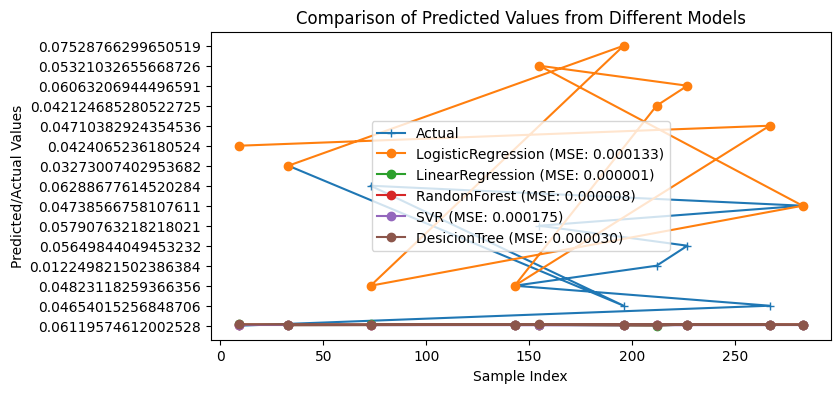

In [29]:

plt.figure(figsize=(8, 4))
plt.plot(results.index[:10], results['Actual'][:10], label='Actual', marker='+')
plt.plot(results.index[:10], results['Model1'][:10], label=f'LogisticRegression (MSE: {mse1:.6f})', marker='o')
plt.plot(results.index[:10], results['Model2'][:10], label=f'LinearRegression (MSE: {mse2:.6f})', marker='o')
plt.plot(results.index[:10], results['Model3'][:10], label=f'RandomForest (MSE: {mse3:.6f})', marker='o')
plt.plot(results.index[:10], results['Model4'][:10], label=f'SVR (MSE: {mse4:.6f})', marker='o')
plt.plot(results.index[:10], results['Model5'][:10], label=f'DesicionTree (MSE: {mse5:.6f})', marker='o')

plt.xlabel('Sample Index')
plt.ylabel('Predicted/Actual Values')
plt.title('Comparison of Predicted Values from Different Models')
plt.legend()
plt.show()


In [30]:
predictions_dict = {'LogisticRegression': prediction1, 'LinearRegression': prediction2, 'RandomForest': prediction3, 'SVR': predictions4, 'DesicionTree': predictions5}

# Iterate through the dictionary and print model name and predictions
for model_name, predictions in predictions_dict.items():
    print(f"{model_name} Predictions:")
    print(predictions)
    print("\n")


LogisticRegression Predictions:
['0.0424065236180524' '0.04710382924354536' '0.04823118259366356'
 '0.042124685280522725' '0.06063206944496591' '0.05321032655668726'
 '0.04738566758107611' '0.04823118259366356' '0.07528766299650519'
 '0.03273007402953682' '0.04879485926872399' '0.06232309947014347'
 '0.04823118259366356' '0.04710382924354536' '0.0424065236180524'
 '0.06063206944496591' '0.04654015256848706' '0.04710382924354536'
 '0.042688361955583155' '0.04710382924354536' '0.03883657134267766'
 '0.042688361955583155' '0.042124685280522725' '0.03329375070459619'
 '0.04823118259366356' '0.03742737965502977' '0.04738566758107611'
 '0.06063206944496591' '0.04823118259366356' '0.042688361955583155'
 '0.042124685280522725' '0.042688361955583155' '0.056780278832062006'
 '0.042688361955583155' '0.0424065236180524' '0.042124685280522725'
 '0.042688361955583155' '0.042688361955583155' '0.04654015256848706'
 '0.03883657134267766' '0.03385742737965556' '0.0424065236180524'
 '0.0424065236180524' 